# Import necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from time import time
from collections import defaultdict

from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.metrics import accuracy_score

In [2]:
original_df = pd.read_csv('data.txt', sep=' ',header=None)
original_df.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2


In [3]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       800 non-null    int64
 1   1       800 non-null    int64
 2   2       800 non-null    int64
 3   3       800 non-null    int64
 4   4       800 non-null    int64
 5   5       800 non-null    int64
 6   6       800 non-null    int64
 7   7       800 non-null    int64
 8   8       800 non-null    int64
 9   9       800 non-null    int64
 10  10      800 non-null    int64
 11  11      800 non-null    int64
 12  12      800 non-null    int64
 13  13      800 non-null    int64
 14  14      800 non-null    int64
 15  15      800 non-null    int64
 16  16      800 non-null    int64
 17  17      800 non-null    int64
 18  18      800 non-null    int64
 19  19      800 non-null    int64
 20  20      800 non-null    int64
 21  21      800 non-null    int64
 22  22      800 non-null    int64
 23  23      800 non

In [4]:
# Split the data into features 'X' and targets 'y'
X, y = original_df.iloc[:,:-1], original_df.iloc[:,-1]
X

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,6,4,12,5,5,3,4,1,67,...,1,0,0,1,0,0,1,0,0,1
1,2,48,2,60,1,3,2,2,1,22,...,1,0,0,1,0,0,1,0,0,1
2,4,12,4,21,1,4,3,3,1,49,...,1,0,0,1,0,0,1,0,1,0
3,1,42,2,79,1,4,3,4,2,45,...,1,0,0,0,0,0,0,0,0,1
4,1,24,3,49,1,3,3,4,4,53,...,1,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,4,9,2,23,2,2,2,4,2,22,...,1,0,0,1,0,1,0,0,0,1
796,1,18,2,75,5,5,3,4,2,51,...,1,0,1,1,0,0,0,0,0,1
797,4,12,4,13,1,2,2,4,2,22,...,1,0,0,1,0,1,0,0,1,0
798,4,24,3,7,5,5,4,4,3,54,...,1,1,0,1,0,0,1,0,0,1


> **Since all columns have no missing values and contain numerical values, so all fine here (for now!).**

# Problem 1.1

In [5]:
# Building the linear model
svm_clf = SVC(kernel='linear')

In [6]:
def accuracy(X, y, model, train_size=0.6, n_models=10):
    '''
    Calculate the average accuracy for n different model, each with different data to be trained on.
    
    Parameters:
        X(2D array, DataFrame): data features train on.
        y(2D array, DataFrame): data targets.
        model(class): the classifier class to be used.
        train_size(int, default=0.6): the portion of the training data.
        n_models(int, default=10): number of models.
    
    Returns:
        acc(float): the average accuracy for n_models.
    '''
    
    accuracy_dict = defaultdict()

    for i in range(n_models):
        X_train, X_test, y_train, y_test = train_test_split(X,
                                                            y,
                                                            train_size=train_size,
                                                            shuffle=True,
                                                            random_state=1)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)

        accuracy_dict[i] = acc

        acc = np.mean(list(accuracy_dict.values()))
        return acc

In [7]:
start = time()
acc = accuracy(X, y, svm_clf)
print(f"The avg accuracy for 10 models with no preprocessing is: {acc*100:0.2f}% \t The total exection time is: {time() - start:0.4f} sec")

The avg accuracy for 10 models with no preprocessing is: 79.38% 	 The total exection time is: 0.1859 sec


# Problem 1.2

## Suggestions for Preprocessing
- **Feature Scaling**
- **Feature Selection**

### Feature Scaling

In [8]:
# Scaling each feature by substracting it form its mean and divide it by its std.
scaler = StandardScaler().fit(X)
X_2 =scaler.transform(X)

In [9]:
X_2 = pd.DataFrame(X_2)
X_2.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-1.274928,-1.205988,1.339838,-0.728311,1.846880,1.335651,0.466161,1.047561,-1.288336,2.756115,...,-0.186893,-0.546536,-0.335643,0.314485,-0.197386,-0.460566,0.635223,-0.147348,-0.501952,0.768412
1,-0.469286,2.251158,-0.505033,1.027647,-0.706043,-0.331308,-0.962686,-0.760527,-1.288336,-1.169509,...,-0.186893,-0.546536,-0.335643,0.314485,-0.197386,-0.460566,0.635223,-0.147348,-0.501952,0.768412
2,1.141997,-0.712110,1.339838,-0.399069,-0.706043,0.502172,0.466161,0.143517,-1.288336,1.185866,...,-0.186893,-0.546536,-0.335643,0.314485,-0.197386,-0.460566,0.635223,-0.147348,1.992221,-1.301385
3,-1.274928,1.757280,-0.505033,1.722713,-0.706043,0.502172,0.466161,1.047561,-0.345364,0.836921,...,-0.186893,-0.546536,-0.335643,-3.179797,-0.197386,-0.460566,-1.574249,-0.147348,-0.501952,0.768412
4,-1.274928,0.275646,0.417402,0.625240,-0.706043,-0.331308,0.466161,1.047561,1.540581,1.534810,...,-0.186893,1.829707,-0.335643,0.314485,-0.197386,-0.460566,-1.574249,-0.147348,-0.501952,0.768412


In [10]:
start = time()
acc_2 = accuracy(X_2, y, svm_clf)
print(f"The avg accuracy for 10 models after feature scaling is: {acc*100:0.2f}% \t The total exection time is: {time() - start:0.4f} sec")

The avg accuracy for 10 models after feature scaling is: 79.38% 	 The total exection time is: 0.0190 sec


> **We can see that feature scaling didn't improve accuracy however, it slightly lowered it, but on the other hand, it reduced the execution time to around 10% of the time taken by non-scaled data.**

### Feature Selection

In [11]:
# Select top 15 features based on mutual info classification
selector = SelectKBest(mutual_info_classif, k = 15).fit(X_2, y)

# Get the names of the top 15 contributing features
top_features = X_2.columns[selector.get_support()]
top_features

Int64Index([0, 1, 2, 3, 4, 5, 6, 10, 12, 13, 14, 15, 17, 20, 23], dtype='int64')

In [12]:
X_3 = X_2[[*top_features]]
X_3.head()

,0,1,2,3,4,5,6,10,12,13,14,15,17,20,23
0,-1.274928,-1.205988,1.339838,-0.728311,1.846880,1.335651,0.466161,0.45834,-0.415957,1.227940,-0.186893,-0.546536,0.314485,0.635223,0.768412
1,-0.469286,2.251158,-0.505033,1.027647,-0.706043,-0.331308,-0.962686,0.45834,-0.415957,-0.814372,-0.186893,-0.546536,0.314485,0.635223,0.768412
2,1.141997,-0.712110,1.339838,-0.399069,-0.706043,0.502172,0.466161,0.45834,2.404093,-0.814372,-0.186893,-0.546536,0.314485,0.635223,-1.301385
3,-1.274928,1.757280,-0.505033,1.722713,-0.706043,0.502172,0.466161,0.45834,2.404093,-0.814372,-0.186893,-0.546536,-3.179797,-1.574249,0.768412
4,-1.274928,0.275646,0.417402,0.625240,-0.706043,-0.331308,0.466161,0.45834,2.404093,-0.814372,-0.186893,1.829707,0.314485,-1.574249,0.768412


In [13]:
start = time()
acc = accuracy(X_3, y, svm_clf)
print(f"The avg accuracy for 10 models after feature scaling and feature selection is: {acc*100:0.2f}% \t The total exection time is: {time() - start:0.4f} sec")

The avg accuracy for 10 models after feature scaling and feature selection is: 78.12% 	 The total exection time is: 0.0175 sec


> **After we have scaled our data, we selected the top 15 features out of all 24 features. Therefore, we can see that the other 9 features don't really contribute to the classifier's decision moreover, the accuracy slightly increased.**

# Problem 2

### Loading Iris dataset

In [14]:
# Load the Iris dataset into features 'iris_data' and targets 'iris_targets'
iris_data, iris_targets = load_iris(return_X_y=True, as_frame=True)
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


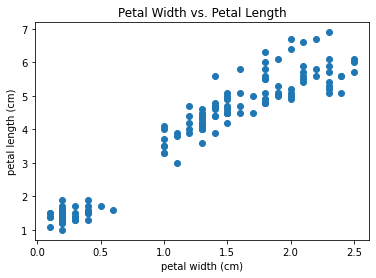

In [15]:
# Plot the last two feature against each other.
plt.scatter(iris_data.iloc[:,-1], iris_data.iloc[:,-2])
plt.title("Petal Width vs. Petal Length")
plt.xlabel("petal width (cm)")
plt.ylabel("petal length (cm)");

In [16]:
# Scaling each feature by substracting it form its mean and divide it by its std for the iris daatset
scaler_2 = StandardScaler().fit(iris_data)
iris_data_prep =scaler_2.transform(iris_data)

# Get the names of the top 2 contributing features
selector_2 = SelectKBest(mutual_info_classif, k = 2).fit(iris_data_prep, iris_targets)

top_features = iris_data.columns[selector_2.get_support()]
top_features

Index(['petal length (cm)', 'petal width (cm)'], dtype='object')

In [17]:
# Get only the last two features 'petal length (cm)', 'petal width (cm)' after scaling and selection
# Convert the target list into a numpy array
iris_data_prep, iris_targets = iris_data_prep[:, -2:], np.array(iris_targets).reshape(-1, 1)
iris_data_prep

array([[-1.34022653e+00, -1.31544430e+00],
       [-1.34022653e+00, -1.31544430e+00],
       [-1.39706395e+00, -1.31544430e+00],
       [-1.28338910e+00, -1.31544430e+00],
       [-1.34022653e+00, -1.31544430e+00],
       [-1.16971425e+00, -1.05217993e+00],
       [-1.34022653e+00, -1.18381211e+00],
       [-1.28338910e+00, -1.31544430e+00],
       [-1.34022653e+00, -1.31544430e+00],
       [-1.28338910e+00, -1.44707648e+00],
       [-1.28338910e+00, -1.31544430e+00],
       [-1.22655167e+00, -1.31544430e+00],
       [-1.34022653e+00, -1.44707648e+00],
       [-1.51073881e+00, -1.44707648e+00],
       [-1.45390138e+00, -1.31544430e+00],
       [-1.28338910e+00, -1.05217993e+00],
       [-1.39706395e+00, -1.05217993e+00],
       [-1.34022653e+00, -1.18381211e+00],
       [-1.16971425e+00, -1.18381211e+00],
       [-1.28338910e+00, -1.18381211e+00],
       [-1.16971425e+00, -1.31544430e+00],
       [-1.28338910e+00, -1.05217993e+00],
       [-1.56757623e+00, -1.31544430e+00],
       [-1.

### Building Linear SVM Classifier form scratch

#### Cost Function "Objective"
<img src="svm_loss.png" width = 100%>

#### Gradients
<img src="svm_gradients.png" width = 100%>

In [18]:
class Linear_SVM():
    def __init__(self, C=1, n_iterations=1000, lr=0.01, add_intercept = False):
        '''
        Linear SVM Classifier Class.
        
        parameters:
            C(int, default=1): the penalty parameter of the error term.
            n_iterations(int, default=1000): the total number of iterations for training.
            lr(float, default=0.01): the learning rate used by gradient descent.
            add_intercept(boolean, default=True): add intercept term to featuresa by adding a column of ones.
        
        '''
        
        self.C = C
        self.lr = lr
        self.n_iterations = n_iterations
        self.add_intercept = add_intercept

    def fit(self, X, y):
        '''
        Applies gradient descent to learn the best weights.
        
        parameters:
            X(2D array, DataFrame): data features train on.
            y(2D array, DataFrame): data targets.
        '''
        
        self.X = X
        self.y = y
        self.m = X.shape[0]
        self.n_weights = X.shape[1]
        
        # Initializing our model's weights
        if self.add_intercept == True:
            self.n_weights += 1
            self.X = np.c_[np.ones((self.X, 1)), self.X]
            self.w = np.random.randn(self.n_weights, 1)
        
        else:
            self.w = np.random.randn(self.n_weights, 1)
        
        for i in range(self.n_iterations):
            self.gradient_descent()
    
    def predict(self, X_test):
        '''
        Inference X_test by predicting 1 for the true class and -1 otherwise
        
        parameters:
            X_test(2D array, DataFrame): data to be tested.

        Returns:
            X_test(array): the predicted classes.
        '''
        
        y_pred = np.dot(X_test, self.w)
        y_pred = np.sign(y_pred) # Return either 1 and -1 for +ve and -ve values, respectively.
        return y_pred
    
    def compute_cost(self):
        '''
        Calculate the total cost function.
        '''
        distances = 1 - self.y * (np.dot(self.X, self.w))
        distances[distances < 0] = 0
        
        cost = (1/2) * np.dot(self.w.T, self.w) + (self.C/self.m) * sum(distances)
        return float(cost)
        
    def gradient_descent(self):
        '''
        Apply gradient descent optimization to update the weights.
        '''
        dw = np.zeros_like(self.w)
        distances = 1 - self.y * (np.dot(self.X, self.w))
        
        for i in range(self.n_weights):
            if max(0, distances[i]) == 0:
                dw += self.w
            else:
                dw += self.w - self.C * self.y[i] * self.X[i].reshape(-1, 1)
            dw = dw/self.m 
        
        self.w = self.w - self.lr * dw

        
    def evaluate_performance(self, y, y_pred):
        '''
        Evaluate the accuracy of the classifier.
        
        parameters:
            y(2D array, DataFrame): The true classes (ground truth)
            y(2D array, DataFrame): the pridected classes.
            
        Returns:
            accuracy(float); the accuracy of the classifier.
        '''
        accuracy = accuracy_score(y,y_pred)
        return accuracy

In [19]:
# Build a binary classifier which predicts 1 for the true class and -1 otherwise.
svm_clf2 = Linear_SVM(C=10, n_iterations=10000, lr=0.003)

In [20]:
# Change the target to be 1 for class '0' and -1 for the other two classes '1' and '2'
iris_targets_binary = [1 if i == 0 else -1 for i in iris_targets]
iris_targets_binary = np.array(iris_targets_binary).reshape(-1, 1) # Convert to a numpy array

In [21]:
svm_clf2.fit(iris_data_prep, iris_targets_binary)

In [22]:
y_pred = svm_clf2.predict(iris_data_prep)

In [23]:
print(f'The total cost fo the iris classifier is:{svm_clf2.compute_cost():.2f}\t\
        The total accuracy is: {svm_clf2.evaluate_performance(iris_targets_binary, y_pred)*100:0.2f}%')

The total cost fo the iris classifier is:3.81	        The total accuracy is: 94.67%
